In [1]:
from tardis.workflows.v_inner_solver import InnerVelocitySolverWorkflow
from tardis.io.configuration.config_reader import Configuration

Iterations:          0/? [00:00<?, ?it/s]

Packets:             0/? [00:00<?, ?it/s]

In [2]:
config = Configuration.from_yaml('../tardis_example.yml')

This code modifies the TARDIS example configuration to include convergence information for the inner boundary velocity solver.
Note that the number of shells is increased and the starting velocity is reduced to provide more granularity and a wider search window, respectively.

In [3]:
from astropy import units as u

config.montecarlo.convergence_strategy['v_inner_boundary'] = {
    'damping_constant' : 0.5,
    'threshold' : 0.01,
    'type' : 'damped',
    'store_iteration_properties' : False
    }

config.montecarlo.convergence_strategy.stop_if_converged = True
config.model.structure.velocity.start = 5000 * u.km/u.s # Larger window over which to search
config.model.structure.velocity.num = 50 # Increase number of shells

workflow = InnerVelocitySolverWorkflow(
    config, tau=2.0/3,
    mean_optical_depth="rosseland"
)

Tabs(height=350, sizing_mode='stretch_width')
    [0] HTML(str, height=300, styles={'overflow-y': 'auto', ...})
    [1] HTML(str, height=300, styles={'overflow-y': 'auto', ...})
    [2] HTML(str, height=300, styles={'overflow-y': 'auto', ...})
    [3] HTML(str, height=300, styles={'overflow-y': 'auto', ...})

In [4]:
workflow.run()

In [5]:
import matplotlib.pyplot as plt

In [6]:
spectrum = workflow.spectrum_solver.spectrum_real_packets
spectrum_virtual = workflow.spectrum_solver.spectrum_virtual_packets
spectrum_integrated = workflow.spectrum_solver.spectrum_integrated

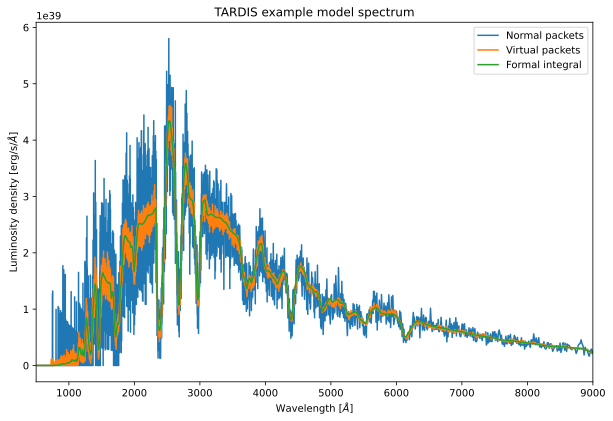

In [7]:
%matplotlib inline
plt.figure(figsize=(10, 6.5))

spectrum.plot(label="Normal packets")
spectrum_virtual.plot(label="Virtual packets")
spectrum_integrated.plot(label='Formal integral')

plt.xlim(500, 9000)
plt.title("TARDIS example model spectrum")
plt.xlabel(r"Wavelength [$\AA$]")
plt.ylabel(r"Luminosity density [erg/s/$\AA$]")
plt.legend()
plt.show()